```
###############################
##                           ##
##  Deep Learning in Python  ##
##                           ##
###############################

§2 Introduction to TensorFlow in Python

§2.2 Linear models

§2.2.3 Linear regression
```

**1. What is linear regression?**

![What is a linear regression](ref6.%20What%20is%20a%20linear%20regression.jpg)

**2. How to make a linear regression model?**

* A linear regression model assumes a linear relationship:

    * e.g., for the example of king county house sales dataset,

        * $price = intercept + size \times slope + error$

* Univariate regression models have only one feature,

    * e.g., for the example above, there could be only one feature, `size`

* Multiple regression models have more than one feature,

    * e.g., for the example above, there also could be two feature, `size` and `location`

**3. Code of linear regression in TensorFlow:**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

housing = pd.read_csv('ref1. King county house sales.csv')

In [ ]:
# Define the targets and features
price = np.array(housing['price'], np.float32)
size = np.array(housing['sqft_living'], np.float32)

# Define the intercept and slope
intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable(0.1, np.float32)

In [ ]:
# Define a linear regression model
def linear_regression(intercept, slope, features=size):
    return intercept + features * slope

In [ ]:
# Compute the predicted values and loss
def loss_function(intercept, slope, targets=price, features=size):
    predictions = linear_regression(intercept, slope)
    return tf.keras.losses.mse(targets, predictions)

In [ ]:
# Define an optimization operation
opt = tf.keras.optimizers.Adam()

In [ ]:
# Minimize the loss function and print the loss
for j in range(50):
    opt.minimize(lambda: loss_function(intercept, slope),
                 var_list=[intercept, slope])
    print(loss_function(intercept, slope))

In [ ]:
# Print the trained parameters
print(intercept.numpy(), slope.numpy())

**4. Practice exercises for linear regression:**

$\blacktriangleright$ **Package pre-loading:**

In [1]:
import pandas as pd
import numpy as np
from tensorflow import add, multiply, keras

$\blacktriangleright$ **Data pre-loading:**

In [20]:
housing = pd.read_csv('ref1. King county house sales.csv')
price_log = np.log(np.array(housing['price'], np.float32))
size_log = np.log(np.array(housing['sqft_lot'], np.float32))

$\blacktriangleright$ **Linear regression set-up practice:**

In [21]:
# Define a linear regression model
def linear_regression(intercept, slope, features=size_log):
    return add(intercept, multiply(features, slope))


# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features=size_log, targets=price_log):
    # Set the predicted values
    predictions = linear_regression(intercept, slope, features)

    # Return the mean squared error loss
    return keras.losses.mse(targets, predictions)


# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

145.44653
71.866


$\blacktriangleright$ **Package re-pre-loading:**

In [22]:
from tensorflow import Variable
import matplotlib.pyplot as plt

$\blacktriangleright$ **Data re-pre-loading:**

In [23]:
intercept = Variable(5, dtype=np.float32)
slope = Variable(0.001, dtype=np.float32)

$\blacktriangleright$ **Code pre-loading:**

In [24]:
def plot_results(intercept, slope):
    size_range = np.linspace(6, 14, 100)
    price_pred = [intercept + slope * s for s in size_range]
    plt.scatter(size_log, price_log, color='black')
    plt.plot(size_range, price_pred, linewidth=3.0, color='red')
    plt.xlabel('log(size)')
    plt.ylabel('log(price)')
    plt.title('Scatterplot of data and fitted regression line')
    plt.show()

$\blacktriangleright$ **Linear model training practice:**

9.681214
11.737101
1.1297756
1.6701097
0.80904144
0.81259125
0.6220206
0.6118439
0.5933767
0.57028323


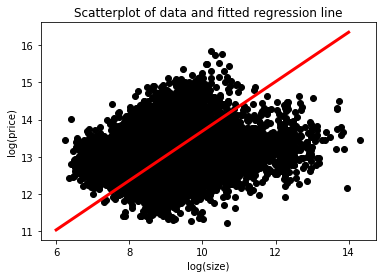

In [25]:
# Initialize an adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(100):
    # Apply minimize, pass the loss function, and supply the variables
    opt.minimize(lambda: loss_function(intercept, slope),
                 var_list=[intercept, slope])

    # Print every 10th value of the loss
    if j % 10 == 0:
        print(loss_function(intercept, slope).numpy())

# Plot data and regression line
plot_results(intercept, slope)

$\blacktriangleright$ **Multiple linear regression practice:**

In [ ]:
from tensorflow import Variable, float32

$\blacktriangleright$ **Data re-pre-loading:**

In [ ]:
features = Variable([1., 2., 3., 4., 5.], dtype=float32)
targets = Variable([2., 4., 6., 8., 10.], dtype=float32)

$\blacktriangleright$ **Loss function modification practice:**

In [ ]:
# Initialize a variable named scalar
scalar = Variable(1.0, float32)


# Define the model
def model(scalar, features=features):
    return scalar * features


# Define a loss function
def loss_function(scalar, features=features, targets=targets):
    # Compute the predicted values
    predictions = model(scalar, features)

    # Return the mean absolute error loss
    return keras.losses.mae(targets, predictions)


# Evaluate the loss function and print the loss
print(loss_function(scalar).numpy())